<a href="https://colab.research.google.com/github/mordor-ai/deep_learning/blob/master/DEEP_LEARNING_TP5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# fonction loss=  

import numpy as np
import tensorflow as tf
from tensorflow import keras
import random
import numpy as np
import matplotlib.pyplot as plt
# import des données images
mnist = tf.contrib.learn.datasets.load_dataset("mnist")
#data_train = mnist.train.images # Returns np.array
#label_train = np.asarray(mnist.train.labels , dtype=np.int32)
#data_test = mnist.test.images # Returns np.array
#label_test = np.asarray(mnist.test.labels ,dtype=np.int32)
#print (data_train.shape)


base =  tf.keras.datasets.cifar100.load_data()
# on normalise
data_train= base[0][0]/255.00
# on normalise en divisant par 255
data_test =  base [1][0]/255.00
label_train = base[0][1]
label_test =base[1][1]


Extracting MNIST-data/train-images-idx3-ubyte.gz
Extracting MNIST-data/train-labels-idx1-ubyte.gz
Extracting MNIST-data/t10k-images-idx3-ubyte.gz
Extracting MNIST-data/t10k-labels-idx1-ubyte.gz
169009152/169001437 [==============================] - 6s 0us/step


In [0]:
print(tf.__version__)
!nvidia-smi
## permet de définir la version de la bibliotheque 
#import tensorflow.compat.v1 as tf

1.15.0
NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



In [0]:
train_labels.shape
train_labels[1]

3

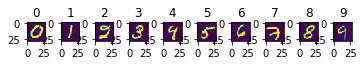

In [0]:
# visualisation des données
import matplotlib.pyplot as plt
for i in range (0,10):
  im = np.reshape(train_data[train_labels==i,:][0],(28,28))
  plt.subplot(10,10,i+1)
  plt.imshow(im)
  plt.title(str(i))
plt.show()


In [0]:
tf.reset_default_graph()

In [0]:
# 28 :  dimension de l'image
# None = taille du batch
# declaration des datas
data = tf.placeholder(tf.float32, shape=(None,32,32,3))
# declaration des labels
# dimension des classes de labels
label = tf.placeholder(tf.float32, shape=(None,10))


#data = tf.placeholder(tf.float32, shape=(None,32,32,3))
#label =  tf.placeholder(tf.float32, shape=(None,100))

In [0]:
def conv2d (in_,name, 
            kernel_size, 
            filters, ## nombre de neurones de la couche
            stride =1,## le pas de la convolution
            padding="SAME" ,##
            activation="relu"):
  num_in_channels =  in_.get_shape()[-1].value
  kernel_shape = [kernel_size,kernel_size, num_in_channels, filters]
  biases =  tf.get_variable(name=name+"/bias",
                            shape = [filters],
                            trainable= True,
                            initializer = tf.constant_initializer(0.1))
  kernel =  tf.get_variable(shape=  kernel_shape,
                            initializer = tf.contrib.layers.xavier_initializer(),
                            trainable= True, name =  name+"/kernel")
  outputs =   tf.nn.conv2d( in_,
                            kernel,
                            [1,stride,stride,1], 
                            padding =  padding) 
  outputs =  tf.nn.bias_add(outputs, biases)
  if activation =='relu':
      return tf.nn.relu(outputs)
  elif  activation== 'rien':
    return outputs

BATCH_SIZE=16

In [0]:
N=  4

c =  conv2d(in_=data,kernel_size=5,filters=96, stride=1, name="conv1")

c =  conv2d(in_=c, kernel_size=3,filters=128,stride=2, name="conv2")

c =  conv2d(in_=c, kernel_size=3,filters=128, stride= 1, name="conv3")

c =  conv2d(in_=c, kernel_size=3,filters=256, stride = 2 ,name="conv4")

c =  conv2d(in_=c, kernel_size=3,filters=256,stride = 2,name="conv5")

c =  conv2d(in_=c, kernel_size=4,filters=N,stride = 1,name="conv6")

c =  conv2d(in_=c, kernel_size=1,filters=256,stride = 1 ,name="conv7")


In [0]:
c = tf.reshape(c,(-1,8,8,4))


In [0]:
c =  tf.layers.conv2d_transpose(c,
                                filters=96,
                                kernel_size=[5,5],
                                strides=[2,2]
                                , padding="SAME",
                                name="deconv8")
#32
c =  tf.layers.conv2d_transpose(c,
                                filters=64,
                                kernel_size=[5,5],
                                strides=[2,2]
                                , padding="SAME",
                                name="deconv9")

c =  tf.layers.conv2d_transpose(c,
                                filters=3,
                                kernel_size=[5,5],
                                strides=[1,1]
                                , padding="SAME",
                                name="deconv10")



In [0]:
c =  conv2d(in_=c,
           kernel_size =5,
           filters=3,
           padding = "SAME",
           name = "conv10", activation="rien"
           )

In [0]:
_loss =tf.reduce_mean((c-data)**2)

In [0]:
optimizer = tf.compat.v1.train.MomentumOptimizer(0.01,0.9)
train= optimizer.minimize(_loss)

In [0]:
# decalration de la session
sess=  tf.Session()
# initialisationd es varaibvles
init =  tf.initialize_all_variables()
sess.run(init)

In [0]:
# creation du batch

import random

def getTrainBatch (size):
  z =  np.zeros((size,32,32,3))
  l = np.zeros((size,100))
  for i in range(0, size):
    r = random.randint(0,data_train.shape[0]-1)
    z[i] = data_train[r]
    l[i,label_train[r]] =1
  return z, l

def getTestBatch():
  size=  data_test.shape[0]
  z =np.zeros((size,32,32,3))
  l = np.zeros((size,100))
  for i in range(0,size):
     z[i] = data_test[i]
     l[i,label_test[i]] = 1
  return z, l




In [0]:
inf_test, inf_label_test=  getTestBatch()


ValueError: ignored

In [0]:
lr_= 0.01
for i in range(0,100000):
  z,l = getTrainBatch(BATCH_SIZE) # 32X32X3
  sess.run(train,feed_dict={data: z, label:l})
  #sess.run(train,feed_dict={data: z, label:l, lr:lr_})
  if i%5000==00
    z= inf_test[:,:,:,:]
    lo, out_ =  sess.run([_loss,out], feed_dict={data:z})
    print(i,"  ",lo)
    plt.subplot(1,4,1)
    plt.imshow(out_[0,:,:,:])
    plt.subplot(1,4,2)
    plt.imshow(z[0,:,:,:])
    plt.subplot(1,4,3)
    plt.imshow(out_[1,:,:,:])
    plt.subplot(1,4,4)
    plt.imshow(z[1,:,:,:])
    plt.show()
  if i%3333==0 and i>0:
    lr_*=0.1
        
        
     
  
  